# **BUSINESS CASE 3: Recheio Rocommendation System**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Project Overview  
This notebook uses the Case3_Recheio_2025 (1).xlsx dataset to build a recommendation system that helps Recheio suggest better products to existing customers.

It addresses two key challenges:<br>
—  How to enrich customer data for more accurate recommendations.<br>
—  How to deliver relevant suggestions across available sales channels. <br>

## 📊 Goal of the notebook

In this notebook we analyse the potential impact our recommendation system could have on Recheio business <br>

<hr>
<a class="anchor" id="setup">

 ## 1. Initial Setup and Data Loading
 </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
recommendations_clients_no_transaction = pd.read_csv('../Data/recommendations_clients_no_transactions.csv')
recommendations_clients_with_transaction = pd.read_csv('../Data/recommendations_clients_with_transactions.csv')
clients_with_transactions = pd.read_csv('../Data/clients_with_transactions.csv')
clients_without_transactions = pd.read_csv('../Data/clients_without_transactions.csv')
products = pd.read_csv('../Data/products_fixed.csv')
transactions = pd.read_csv('../Data/transactions_fixed.csv')

Percentage of Own Brand products sold: 42.8%


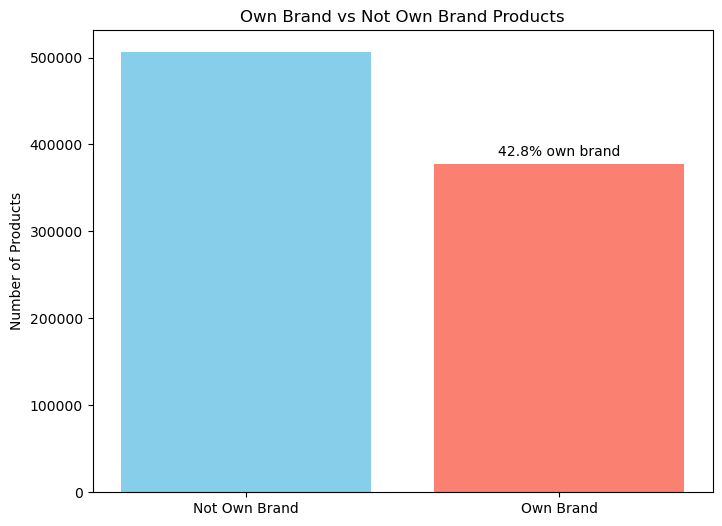

In [7]:
merged_df = transactions.merge(clients_with_transactions, on='Client ID', how='inner')\
                        .merge(products, left_on='ID Product', right_on='ID Product', how='inner')
merged_df.head()

# Count the number of own brand vs not own brand products
brand_counts = merged_df['Own Brand'].value_counts().sort_index()
total_products = brand_counts.sum()
pct_own_brand = brand_counts[1] / total_products * 100

# Change index labels for clarity
brand_labels = {0: 'Not Own Brand', 1: 'Own Brand'}
brand_counts.index = brand_counts.index.map(brand_labels)

print(f"Percentage of Own Brand products sold: {pct_own_brand:.1f}%")
# Plot the results
plt.figure(figsize=(8,6))
plt.bar(brand_counts.index, brand_counts.values, color=['skyblue', 'salmon'])
plt.ylabel("Number of Products")
plt.title("Own Brand vs Not Own Brand Products")
plt.text(1, brand_counts['Own Brand'] + total_products * 0.01, f"{pct_own_brand:.1f}% own brand", ha='center')
plt.show()
